<a href="https://colab.research.google.com/github/hiiamjay/Deep-Learning/blob/main/Experiments/DL_EXP_1_2_10_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Arabic alphabets**

## Importing Data and Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

In [2]:
!wget http://upscfever.com/datasets/csvTrainImages13440x1024.csv -P drive/app
!wget http://upscfever.com/datasets/csvTrainLabel13440x1.csv -P drive/app
!wget http://upscfever.com/datasets/csvTestImages3360x1024.csv -P drive/app
!wget http://upscfever.com/datasets/csvTestLabel3360x1.csv -P drive/app

--2020-12-06 18:41:22--  http://upscfever.com/datasets/csvTrainImages13440x1024.csv
Resolving upscfever.com (upscfever.com)... 172.67.193.2, 104.27.177.133, 104.27.176.133, ...
Connecting to upscfever.com (upscfever.com)|172.67.193.2|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://upscfever.com/datasets/csvTrainImages13440x1024.csv [following]
--2020-12-06 18:41:22--  https://upscfever.com/datasets/csvTrainImages13440x1024.csv
Connecting to upscfever.com (upscfever.com)|172.67.193.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘drive/app/csvTrainImages13440x1024.csv’

csvTrainImages13440     [ <=>                ]  28.22M  --.-KB/s    in 0.1s    

2020-12-06 18:41:22 (208 MB/s) - ‘drive/app/csvTrainImages13440x1024.csv’ saved [29593405]

--2020-12-06 18:41:22--  http://upscfever.com/datasets/csvTrainLabel13440x1.csv
Resolving upscfever.com (upscfever.com)... 172.67.193.2, 10

In [3]:
train_x = pd.read_csv('drive/app/csvTrainImages13440x1024.csv', header = None)
train_y = pd.read_csv('drive/app/csvTrainLabel13440x1.csv', header = None)
test_x = pd.read_csv('drive/app/csvTestImages3360x1024.csv', header = None)
test_y = pd.read_csv('drive/app/csvTestLabel3360x1.csv', header = None)

In [4]:
train_x.info()
test_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13440 entries, 0 to 13439
Columns: 1024 entries, 0 to 1023
dtypes: int64(1024)
memory usage: 105.0 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Columns: 1024 entries, 0 to 1023
dtypes: int64(1024)
memory usage: 26.3 MB


In [5]:
train_x = train_x.iloc[:,:].values.astype('float32')
train_y = train_y.iloc[:,:].values.astype('int32')-1
test_x = test_x.iloc[:,:].values.astype('float32')
test_y = test_y.iloc[:,:].values.astype('int32')-1

In [6]:
def row_calculator(number_of_images, number_of_columns):
    if number_of_images % number_of_columns != 0:
        return (number_of_images / number_of_columns)+1
    else:
        return (number_of_images / number_of_columns)

In [7]:
def show_image(x, img_size, number_of_images):
    plt.figure(figsize = (8, 7))
    if x.shape[0] > 0:
        n_samples = x.shape[0]
        x = x.reshape(n_samples, img_size, img_size)
        number_of_rows = row_calculator(number_of_images, 4)
        for i in range(number_of_images):
            plt.subplot(number_of_rows, 4, i+1)
            plt.imshow(x[i])

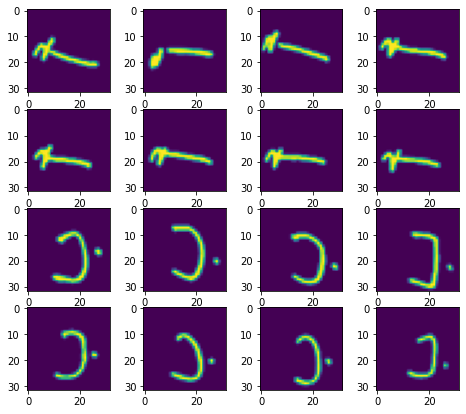

In [8]:
show_image(train_x, 32, 16)

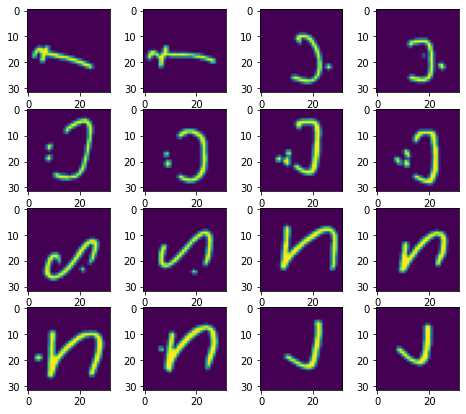

In [9]:
show_image(test_x, 32, 16)

## Pre-Processing


In [10]:
train_y = to_categorical(train_y,28)

In [11]:
train_x = train_x/255
test_x = test_x/255

In [12]:
train_x = train_x.reshape([-1, 32, 32, 1])
test_x = test_x.reshape([-1, 32, 32, 1])

In [13]:
train_x.shape

(13440, 32, 32, 1)

## Model Building

In [14]:
from keras import models
from keras import layers
from keras import optimizers
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [15]:
recognizer = Sequential()

recognizer.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (32,32,1)))
recognizer.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
recognizer.add(MaxPool2D(pool_size=(2,2)))
recognizer.add(Dropout(0.25))


recognizer.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
recognizer.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
recognizer.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
recognizer.add(Dropout(0.25))


recognizer.add(Flatten())
recognizer.add(Dense(units = 256, input_dim = 1024, activation = 'relu'))
recognizer.add(Dense(units = 256, activation = "relu"))
recognizer.add(Dropout(0.5))
recognizer.add(Dense(28, activation = "softmax"))

recognizer.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [16]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
recognizer.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [17]:
datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False,  
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.1,  
        width_shift_range=0.1, 
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False)

In [18]:
datagen.fit(train_x)

In [19]:
history = recognizer.fit(datagen.flow(train_x,train_y, batch_size=100),
                             epochs = 30, verbose = 2, steps_per_epoch=train_x.shape[0] // 100)

Epoch 1/30
134/134 - 4s - loss: 2.5110 - accuracy: 0.2283
Epoch 2/30
134/134 - 4s - loss: 1.3940 - accuracy: 0.5307
Epoch 3/30
134/134 - 4s - loss: 0.9640 - accuracy: 0.6744
Epoch 4/30
134/134 - 4s - loss: 0.7282 - accuracy: 0.7563
Epoch 5/30
134/134 - 4s - loss: 0.5706 - accuracy: 0.8088
Epoch 6/30
134/134 - 4s - loss: 0.4764 - accuracy: 0.8441
Epoch 7/30
134/134 - 4s - loss: 0.4020 - accuracy: 0.8681
Epoch 8/30
134/134 - 4s - loss: 0.3522 - accuracy: 0.8833
Epoch 9/30
134/134 - 4s - loss: 0.3100 - accuracy: 0.9025
Epoch 10/30
134/134 - 4s - loss: 0.2748 - accuracy: 0.9119
Epoch 11/30
134/134 - 4s - loss: 0.2666 - accuracy: 0.9142
Epoch 12/30
134/134 - 4s - loss: 0.2495 - accuracy: 0.9211
Epoch 13/30
134/134 - 4s - loss: 0.2283 - accuracy: 0.9263
Epoch 14/30
134/134 - 4s - loss: 0.2074 - accuracy: 0.9340
Epoch 15/30
134/134 - 4s - loss: 0.1966 - accuracy: 0.9407
Epoch 16/30
134/134 - 4s - loss: 0.1893 - accuracy: 0.9399
Epoch 17/30
134/134 - 4s - loss: 0.1767 - accuracy: 0.9441
Epoch 

In [22]:
recognizer.save('final_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: final_model/assets


## Model Evaluation

In [24]:
from tensorflow import keras
model = keras.models.load_model('final_model')

In [25]:
y_test = to_categorical(test_y)

In [28]:
_, test_acc = model.evaluate(test_x, y_test, verbose=2)
print('Test: %.3f' % ( test_acc))

105/105 - 0s - loss: 0.1489 - accuracy: 0.9690
Test: 0.969


In [29]:
predictions = model.predict(test_x)
predictions = np.argmax(predictions,axis = 1)

In [30]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_y, predictions)

In [31]:
accuracy = sum(cm[i][i] for i in range(28)) / test_y.shape[0]
print("accuracy = " + str(accuracy))

accuracy = 0.969047619047619


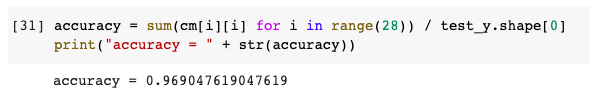

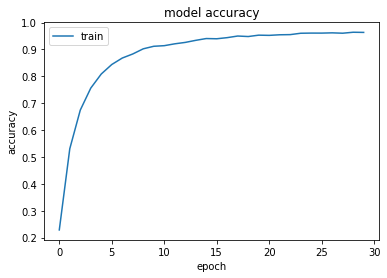

In [33]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

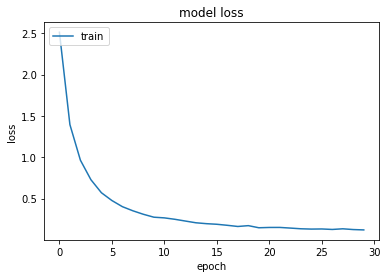

In [34]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [35]:
predictions = model.predict(test_x)
predictions = np.argmax(predictions,axis = 1)
predictions

array([ 0,  0,  1, ..., 26, 27, 27])

In [37]:
from sklearn.metrics import precision_score, recall_score
print('precision score - ',precision_score(test_y, predictions, average="macro"))
print('recall score - ', recall_score(test_y, predictions, average="macro"))

precision score -  0.9704082817430744
recall score -  0.969047619047619


# **Flower recognition**

## Importing Data and Libraries

In [38]:
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

from keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [39]:
np.random.seed(42)
rn.seed(42)

In [40]:
!wget http://upscfever.com/datasets/flowers-new.zip -P drive/app
import os
os.chdir('drive/app')  #change dir
!unzip -q flowers-new.zip  #unzip data in test/

--2020-12-06 18:50:34--  http://upscfever.com/datasets/flowers-new.zip
Resolving upscfever.com (upscfever.com)... 104.27.177.133, 104.27.176.133, 172.67.193.2, ...
Connecting to upscfever.com (upscfever.com)|104.27.177.133|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://upscfever.com/datasets/flowers-new.zip [following]
--2020-12-06 18:50:34--  https://upscfever.com/datasets/flowers-new.zip
Connecting to upscfever.com (upscfever.com)|104.27.177.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘drive/app/flowers-new.zip’

flowers-new.zip         [          <=>       ]   5.74M  2.21MB/s    in 2.6s    

2020-12-06 18:50:38 (2.21 MB/s) - ‘drive/app/flowers-new.zip’ saved [6021364]



In [41]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_DAISY_DIR='flowers/daisy'
FLOWER_SUNFLOWER_DIR='flowers/sunflower'
FLOWER_TULIP_DIR='flowers/tulip'
FLOWER_DANDI_DIR='flowers/dandelion'
FLOWER_ROSE_DIR='flowers/rose'

In [42]:
def assign_label(img,flower_type):
    return flower_type

def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [43]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))

100%|██████████| 13/13 [00:00<00:00, 222.17it/s]

13


In [44]:
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))

100%|██████████| 26/26 [00:00<00:00, 400.90it/s]

39


In [45]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|██████████| 26/26 [00:00<00:00, 417.52it/s]

65


In [46]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

100%|██████████| 26/26 [00:00<00:00, 424.02it/s]

91


In [47]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

100%|██████████| 26/26 [00:00<00:00, 388.91it/s]

117


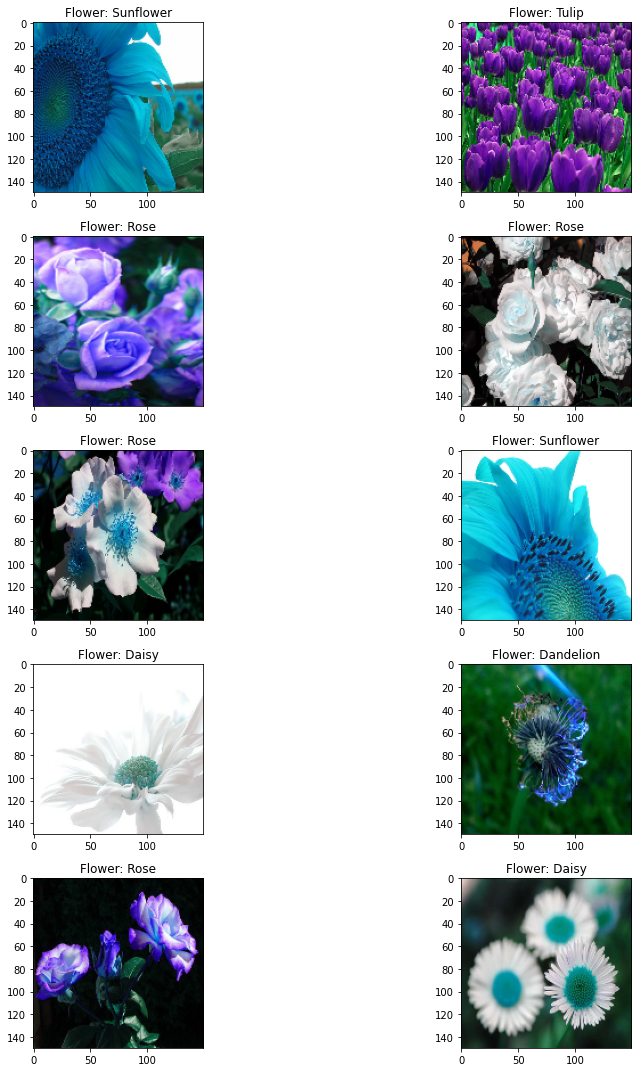

In [60]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()

## Pre-Processing

In [48]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

In [49]:
print(X.shape)
print(Y.shape)

(117, 150, 150, 3)
(117, 5)


In [66]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20)

In [67]:
print(x_test.shape)

(24, 150, 150, 3)


## Model Building

In [68]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

In [69]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 18, 18, 96)       

In [70]:
batch_size=128
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [71]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [72]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 18, 18, 96)       

In [73]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1)
# model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

Epoch 1/50
1/1 [==============================] - 0s 227ms/step - loss: 1.6130 - accuracy: 0.1720 - val_loss: 2.1603 - val_accuracy: 0.1667
Epoch 2/50
1/1 [==============================] - 0s 87ms/step - loss: 1.9231 - accuracy: 0.2366 - val_loss: 1.5501 - val_accuracy: 0.3750
Epoch 3/50
1/1 [==============================] - 0s 81ms/step - loss: 1.6055 - accuracy: 0.3763 - val_loss: 1.5490 - val_accuracy: 0.5000
Epoch 4/50
1/1 [==============================] - 0s 80ms/step - loss: 1.5970 - accuracy: 0.3763 - val_loss: 1.5492 - val_accuracy: 0.5000
Epoch 5/50
1/1 [==============================] - 0s 81ms/step - loss: 1.5740 - accuracy: 0.3763 - val_loss: 1.5190 - val_accuracy: 0.3750
Epoch 6/50
1/1 [==============================] - 0s 80ms/step - loss: 1.5362 - accuracy: 0.3656 - val_loss: 1.4867 - val_accuracy: 0.3750
Epoch 7/50
1/1 [==============================] - 0s 79ms/step - loss: 1.4905 - accuracy: 0.3441 - val_loss: 1.4593 - val_accuracy: 0.3750
Epoch 8/50
1/1 [==========

## Model Evaluation

In [74]:
val_acc = model.fit(x_test,y_test)

1/1 [==============================] - 0s 19ms/step - loss: 3.0160 - accuracy: 0.5833


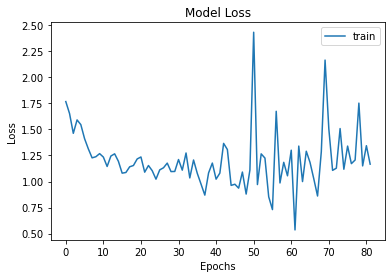

In [75]:
plt.plot(h.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [76]:
model = load_model('/content/flowers.h5')